The goal for this notebook is to learn the in's and out's of using pandas, selecting and manipulating specific data, and visualizing the data. This should all culminate in descriptive analysis of the Chicago City Salaries Data. 

In [116]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.__version__
#  API Reference: http://pandas.pydata.org/pandas-docs/stable/api.html

u'0.17.1'

In [117]:
salaries = pd.read_csv('chicago-salaries.csv')
salaries.head()

Name            Position Title        Department      Salary
0      AARON,  ELVIA J          WATER RATE TAKER       WATER MGMNT   $88968.00
1    AARON,  JEFFERY M            POLICE OFFICER            POLICE   $80778.00
2       AARON,  KARINA            POLICE OFFICER            POLICE   $80778.00
3  AARON,  KIMBERLEI R  CHIEF CONTRACT EXPEDITER  GENERAL SERVICES   $84780.00
4  ABAD JR,  VICENTE M         CIVIL ENGINEER IV       WATER MGMNT  $104736.00

In [118]:
salaries.columns = ['name','position_title','department','salary']
salaries.columns

Index([u'name', u'position_title', u'department', u'salary'], dtype='object')

In [119]:
salaries.describe()

name  position_title department     salary
count            32181           32181      32181      32181
unique           31893            1094         35       1148
top     PEREZ,  JOSE A  POLICE OFFICER     POLICE  $86520.00
freq                 4            9489      13570       2493

In [120]:
# index = df['b'].index[df['b'].apply(np.isnan)]
# salaries['salary'].index[salaries['salary'].apply(np.isnan)]
salaries.info()
# Histogram plotting and isnan aren't working because salary is considered a text object and not an int or float
# I need to convert salaries to float. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32181 entries, 0 to 32180
Data columns (total 4 columns):
name              32181 non-null object
position_title    32181 non-null object
department        32181 non-null object
salary            32181 non-null object
dtypes: object(4)
memory usage: 1.2+ MB


In [121]:
# df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)
# can be read as apply this function (pd.to_numeric) to these columns
salaries['salary'].replace(to_replace="$",value="",inplace=True)
# Above attempt is searching for value that equal $, not elements within the value
# df['col1'].apply(function - by default on a row by row basis)
# Below - This will allow me to replace parts of text for datum 
salaries['salary'] = salaries['salary'].apply((lambda x: float(x.replace('$',''))))

In [122]:
salaries['salary'].index[salaries['salary'].apply(np.isnan)]

Int64Index([], dtype='int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126b68890>]], dtype=object)

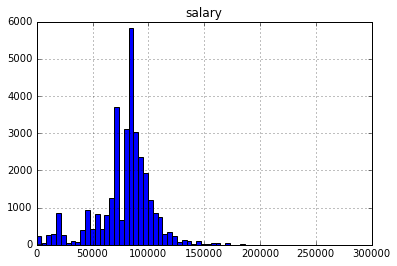

In [123]:
salaries.hist(column = 'salary', bins = 60)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126f5f850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a46d750>]], dtype=object)

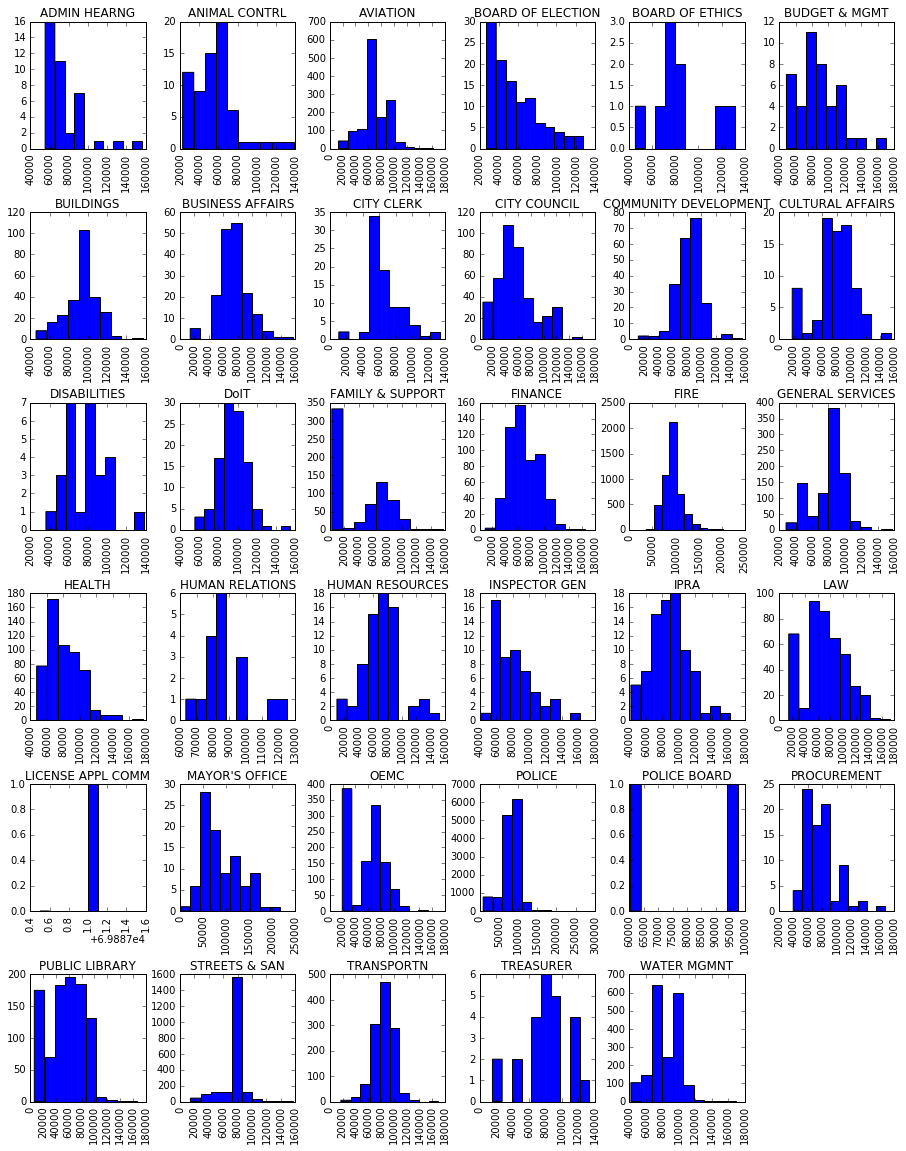

In [124]:
salaries.hist(column = 'salary', by = 'department', bins = 10,figsize = (15,20))
# figsize determines the size of the figure - as a whole - in inch; (width, height) 

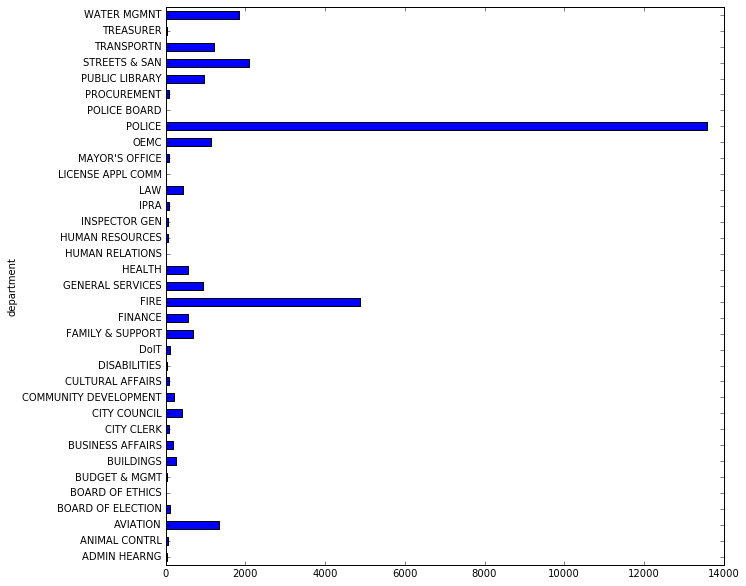

In [125]:
departments = salaries.groupby('department')
departments.position_title.count().plot(kind='barh',figsize=(10,10))

In [126]:
salaries[salaries.position_title == 'POLICE OFFICER'].count(),salaries[salaries.department == 'POLICE'].count()
# departments.salary.sum().plot.pie(subplots = True, figsize=(10,10), )

(name              9489
 position_title    9489
 department        9489
 salary            9489
 dtype: int64, name              13570
 position_title    13570
 department        13570
 salary            13570
 dtype: int64)

In [127]:
#  To find a list of unique values - http://chrisalbon.com/python/pandas_list_unique_values_in_column.html
salaries.position_title[salaries.department == 'POLICE'].nunique()
# Unique number of titles within the Police Department

129

In [128]:
# searching for a record where POLCE OFFCER is part of the title, but not the full title
salaries[salaries.position_title == 'POLCE OFFCER (ASSGNED AS DETECTVE)']

Empty DataFrame
Columns: [name, position_title, department, salary]
Index: []

In [129]:
# double checking that .find() works as I expect
salaries['position_title'].iloc[74].find('POLCE OFFCER')

-1

In [130]:
# salaries.position_title[(salaries.department == 'POLICE')].unique()
########### 
###########
###########
# I've stopped here!!!! I'm trying to figure out how to  change all the Polce Offcer ** to just Polce offcer
###########
###########
###########
# simple_titles['simple_title'] = simple_titles['position_title'].map(lambda x: 'CHUCK OFFICER' if x.find('POLICE OFFICER') > 0 else x)
# salaries.position_title.str.contains('POLICE OFFICER')
#  Attach the code above to an index list, create a new column (or series) can have it store simplified position names.
#  Use this simple list to determine who is part of the police department, but not an officer and plot their salaries.

In [131]:
salaries['position_title'] = salaries['position_title'].apply((lambda x: x.replace('I','')))
salaries['position_title'] = salaries['position_title'].apply((lambda x: x.replace('II','')))
salaries['position_title'] = salaries['position_title'].apply((lambda x: x.replace('III','')))

In [132]:
#  So let create a bar plot to determine the distribution of employees within the police department by their job title
police_dept = salaries[['position_title','department']][salaries.department == 'POLICE'].groupby(['department','position_title'])
# police_dept.head()[:10]
salaries.position_title[salaries.department == 'POLICE'].unique()

array(['POLCE OFFCER', 'CLERK ', 'CROSSNG GUARD',
       'POLCE OFFCER (ASSGNED AS EVDENCE TECHNCAN)',
       'POLCE OFFCER (ASSGNED AS DETECTVE)', 'CLNCAL THERAPST ',
       'PROPERTY CUSTODAN', 'CROSSNG GUARD - PER AGREEMENT', 'LEUTENANT',
       'SERGEANT', 'CRMNAL HSTORY ANALYST', 'PERSONAL COMPUTER OPERATOR ',
       'POLCE OFFCER/EXPLSV DETECT K9 HNDLR',
       'POLCE OFFCER / FLD TRNG OFFCER', 'POLCE TECHNCAN', 'DEPUTY CHEF',
       'DETENTON ADE', 'CAPTAN', 'MANAGER OF POLCE PAYROLLS',
       'POLCE CADET', 'CLERK V', 'EXPLOSVES TECHNCAN ', 'POLCE AGENT',
       'POLCE OFFCER (ASGND AS MARNE OFFCER)', 'PERSONNEL ASSSTANT',
       'DR OF FACLTES MANAGEMENT',
       'POLCE OFFCER (ASGND AS MOUNTED PATROL OFFCER)',
       'POLCE OFFCER (ASSGNED AS CANNE HANDLER)', 'COMMANDER',
       'NFORMATON SERVCES COORD', 'TMEKEEPER - CPD', 'PROGRAM ANALYST',
       'COMMUNTY ORGANZER-CAPS', 'ADMNSTRATVE ASST ', 'STAFF ASST',
       'SENOR DATA ENTRY OPERATOR', 'DATA ENTRY OPERATOR',
       '

In [133]:
police_dept['position_title'][police_dept['position_title']].count().plot(kind='barh',figsize=(10,30))
# departments.position_title.count().plot(kind='barh',figsize=(10,10))

NotImplementedError: Not implemented: <pandas.core.groupby.SeriesGroupBy object at 0x12dd890d0>

In [134]:
# Since there are so many Police Officers in the Police department, I want to find a way to remove them form the group and 
# Plot the salary distribution of remaining employeess. 

In [135]:
original = pd.read_csv('chicago-salaries.csv')
original.columns = ['name','title','department','salary']
original.describe()

name           title department     salary
count            32181           32181      32181      32181
unique           31893            1094         35       1148
top     PEREZ,  JOSE A  POLICE OFFICER     POLICE  $86520.00
freq                 4            9489      13570       2493

In [136]:
original['salary'] = original['salary'].apply((lambda x: float(x.replace('$',''))))

In [137]:
#  checking that replace was applied properly
original.head()

name                     title        department  salary
0      AARON,  ELVIA J          WATER RATE TAKER       WATER MGMNT   88968
1    AARON,  JEFFERY M            POLICE OFFICER            POLICE   80778
2       AARON,  KARINA            POLICE OFFICER            POLICE   80778
3  AARON,  KIMBERLEI R  CHIEF CONTRACT EXPEDITER  GENERAL SERVICES   84780
4  ABAD JR,  VICENTE M         CIVIL ENGINEER IV       WATER MGMNT  104736

In [138]:
# Unique department labels
original.department.unique()

array(['WATER MGMNT', 'POLICE', 'GENERAL SERVICES', 'CITY COUNCIL',
       'STREETS & SAN', 'AVIATION', 'FIRE', 'FAMILY & SUPPORT', 'IPRA',
       'PUBLIC LIBRARY', 'DoIT', 'BUSINESS AFFAIRS', 'OEMC', 'TRANSPORTN',
       'HEALTH', "MAYOR'S OFFICE", 'LAW', 'FINANCE', 'CULTURAL AFFAIRS',
       'COMMUNITY DEVELOPMENT', 'BUILDINGS', 'ANIMAL CONTRL', 'CITY CLERK',
       'BOARD OF ELECTION', 'INSPECTOR GEN', 'TREASURER', 'DISABILITIES',
       'HUMAN RESOURCES', 'PROCUREMENT', 'HUMAN RELATIONS',
       'BOARD OF ETHICS', 'POLICE BOARD', 'BUDGET & MGMT', 'ADMIN HEARNG',
       'LICENSE APPL COMM'], dtype=object)

In [139]:
# Take a look at the differen title variations for police and fire
original['title'][original.department == 'POLICE'].unique
# focus on POLICE OFFICER for POLICE

<bound method Series.unique of 1                                          POLICE OFFICER
2                                          POLICE OFFICER
9                                          POLICE OFFICER
11                                              CLERK III
13                                         POLICE OFFICER
14                                         POLICE OFFICER
16                                         POLICE OFFICER
21                                         CROSSING GUARD
24                                         POLICE OFFICER
31                                         POLICE OFFICER
34                                         POLICE OFFICER
44                                         POLICE OFFICER
46                                         POLICE OFFICER
48                                         POLICE OFFICER
51       POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN)
53                                         POLICE OFFICER
54                                       

In [140]:
original['title'][original.department == 'FIRE'].unique
# focus on FIREFIGHTER for FIRE

<bound method Series.unique of 8                                        FIRE ENGINEER
15       FIREFIGHTER (PER ARBITRATORS AWARD)-PARAMEDIC
17                               FIREFIGHTER/PARAMEDIC
19                                     FIREFIGHTER-EMT
20                                          LIEUTENANT
25                                           PARAMEDIC
35                                 AMBULANCE COMMANDER
37                                     FIREFIGHTER-EMT
43                                     FIREFIGHTER-EMT
64                                         FIREFIGHTER
66                                      LIEUTENANT-EMT
73                                         FIREFIGHTER
84                                     FIREFIGHTER-EMT
85                                           PARAMEDIC
98                                         FIREFIGHTER
103                                      PARAMEDIC I/C
105                                    FIREFIGHTER-EMT
122                               

In [141]:
#  creating simple_label column
def simple_label(x):
    if x.find('POLICE OFFICER') >= 0:
        return 'POLICE OFFICER'
    elif x.find('FIREFIGHTER') >= 0:
        return 'FIREFIGTHER'
original['simple_label'] = original['title'].map(lambda x: simple_label(x))

In [142]:
# Checking that data returned as expected
original[original.department == 'POLICE'].head()
original[original.department == 'FIRE'].head()

name                                          title  \
8   ABBATEMARCO,  JAMES J                                  FIRE ENGINEER   
15    ABDELLATIF,  AREF R  FIREFIGHTER (PER ARBITRATORS AWARD)-PARAMEDIC   
17    ABDOLLAHZADEH,  ALI                          FIREFIGHTER/PARAMEDIC   
19    ABDULLAH,  DANIEL N                                FIREFIGHTER-EMT   
20       ABDULLAH,  KEVIN                                     LIEUTENANT   

   department  salary simple_label  
8        FIRE   90456         None  
15       FIRE   98244  FIREFIGTHER  
17       FIRE   87720  FIREFIGTHER  
19       FIRE   91764  FIREFIGTHER  
20       FIRE  110370         None

In [167]:
# departments to focus POLICE and FIRE
fire_dept = original[['title','simple_label','department','salary']][(original.department == 'FIRE') & (original.simple_label == 'FIREFIGTHER')].groupby(['department','title'])
police_dept = original[['title','simple_label','department','salary']][(original.department == 'POLICE') & (original.simple_label == 'POLICE OFFICER')].groupby(['department','title'])

In [168]:
police_dept.head()

title    simple_label  \
1                                        POLICE OFFICER  POLICE OFFICER   
2                                        POLICE OFFICER  POLICE OFFICER   
9                                        POLICE OFFICER  POLICE OFFICER   
13                                       POLICE OFFICER  POLICE OFFICER   
14                                       POLICE OFFICER  POLICE OFFICER   
51     POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN)  POLICE OFFICER   
74               POLICE OFFICER (ASSIGNED AS DETECTIVE)  POLICE OFFICER   
102              POLICE OFFICER (ASSIGNED AS DETECTIVE)  POLICE OFFICER   
120              POLICE OFFICER (ASSIGNED AS DETECTIVE)  POLICE OFFICER   
130              POLICE OFFICER (ASSIGNED AS DETECTIVE)  POLICE OFFICER   
186              POLICE OFFICER (ASSIGNED AS DETECTIVE)  POLICE OFFICER   
235    POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN)  POLICE OFFICER   
275               POLICE OFFICER/EXPLSV DETECT K9 HNDLR  POLICE OFFICER   
326                   POLICE OFFICER / FLD TRNG OFFICER  POLICE OFFICER   
465            POLICE OFFICER (ASGND AS MARINE OFFICER)  POLICE OFFICER   
488                   POLICE OFFICER / FLD TRNG OFFICER  POLICE OFFICER   
523    POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN)  POLICE OFFICER   
563                   POLICE OFFICER / FLD TRNG OFFICER  POLICE OFFICER   
669    POLICE OFFICER (ASGND AS MOUNTED PATROL OFFICER)  POLICE OFFICER   
729         POLICE OFFICER (ASSIGNED AS CANINE HANDLER)  POLICE OFFICER   
880    POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN)  POLICE OFFICER   
886               POLICE OFFICER/EXPLSV DETECT K9 HNDLR  POLICE OFFICER   
1125                  POLICE OFFICER / FLD TRNG OFFICER  POLICE OFFICER   
1131                  POLICE OFFICER / FLD TRNG OFFICER  POLICE OFFICER   
1151   POLICE OFFICER (ASGND AS MOUNTED PATROL OFFICER)  POLICE OFFICER   
1314   POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN)  POLICE OFFICER   
1848           POLICE OFFICER (ASGND AS MARINE OFFICER)  POLICE OFFICER   
1933              POLICE OFFICER/EXPLSV DETECT K9 HNDLR  POLICE OFFICER   
2108   POLICE OFFICER (ASGND AS MOUNTED PATROL OFFICER)  POLICE OFFICER   
2260             POLICE OFFICER (PER ARBITRATION AWARD)  POLICE OFFICER   
...                                                 ...             ...   
2496        POLICE OFFICER (ASSIGNED AS CANINE HANDLER)  POLICE OFFICER   
2739              POLICE OFFICER/EXPLSV DETECT K9 HNDLR  POLICE OFFICER   
3124    POLICE OFFICER (ASSIGNED AS TRAFFIC SPECIALIST)  POLICE OFFICER   
3165           POLICE OFFICER (ASGND AS MARINE OFFICER)  POLICE OFFICER   
3291           POLICE OFFICER (ASGND AS MARINE OFFICER)  POLICE OFFICER   
3386   POLICE OFFICER (ASGND AS MOUNTED PATROL OFFICER)  POLICE OFFICER   
3518              POLICE OFFICER/EXPLSV DETECT K9 HNDLR  POLICE OFFICER   
3599    POLICE OFFICER (ASSIGNED AS TRAFFIC SPECIALIST)  POLICE OFFICER   
3677   POLICE OFFICER (ASGND AS MOUNTED PATROL OFFICER)  POLICE OFFICER   
3720           POLICE OFFICER(ASGND AS LATENT PRINT EX)  POLICE OFFICER   
4424   POLICE OFFICER (ASSIGNED AS SECURITY SPECIALIST)  POLICE OFFICER   
5475           POLICE OFFICER(ASGND AS LATENT PRINT EX)  POLICE OFFICER   
6021           POLICE OFFICER(ASGND AS LATENT PRINT EX)  POLICE OFFICER   
6156    POLICE OFFICER (ASSIGNED AS TRAFFIC SPECIALIST)  POLICE OFFICER   
6162           POLICE OFFICER(ASGND AS LATENT PRINT EX)  POLICE OFFICER   
6196    POLICE OFFICER (ASSIGNED AS TRAFFIC SPECIALIST)  POLICE OFFICER   
6269           POLICE OFFICER(ASGND AS LATENT PRINT EX)  POLICE OFFICER   
6659           POLICE OFFICER (ASGND AS MARINE OFFICER)  POLICE OFFICER   
6751   POLICE OFFICER (ASSIGNED AS SECURITY SPECIALIST)  POLICE OFFICER   
7328        POLICE OFFICER (ASSIGNED AS CANINE HANDLER)  POLICE OFFICER   
8592   POLICE OFFICER (ASSIGNED AS SECURITY SPECIALIST)  POLICE OFFICER   
9165   POLICE OFFICER (ASSIGNED AS SECURITY SPECIALIST)  POLICE OFFICER   


simple_label
POLICE OFFICER    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

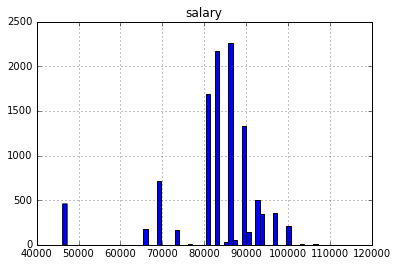

In [169]:
# Original police_dept grouping didn't work with the 
police_dept_sm = original[['simple_label','salary']][(original.department == 'POLICE') & (original.simple_label == 'POLICE OFFICER')].groupby(['simple_label'])
police_dept_sm.hist(column = 'salary', bins = 60)

simple_label
FIREFIGTHER    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

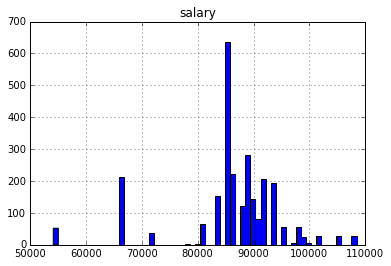

In [171]:
fire_dept_sm = original[['simple_label','salary']][(original.department == 'FIRE') & (original.simple_label == 'FIREFIGTHER')].groupby(['simple_label'])
fire_dept_sm.hist(column = 'salary', bins = 60)

In [173]:
fire_dept_sm.describe(), police_dept_sm.describe()

(                           salary
 simple_label                     
 FIREFIGTHER  count    2636.000000
              mean    86208.955994
              std      9209.371207
              min     54114.000000
              25%     85680.000000
              50%     86520.000000
              75%     90798.000000
              max    108462.000000,                              salary
 simple_label                       
 POLICE OFFICER count   10634.000000
                mean    83175.384803
                std     10370.753772
                min     46200.000000
                25%     80778.000000
                50%     83616.000000
                75%     89718.000000
                max    110370.000000)

In [174]:
fire_dept_sm.salary.median(), police_dept_sm.salary.median()

(simple_label
 FIREFIGTHER    86520
 Name: salary, dtype: float64, simple_label
 POLICE OFFICER    83616
 Name: salary, dtype: float64)